#### Import Libraries

In [1]:
import sys
sys.path.append('/Users/w5b0h0/Desktop/gradient normalization/gradient normalization')

import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from algorithms import FedAvg, SCAFFOLD
# from utils.util import create_fresh_models
from utils import Client, Server, create_fresh_models, plot_accuracy_comparison, plot_loss_comparison
from model import LogisticRegressionBinary, MLP, ResNet, resnet18
from data import split_doubly_stochastic_direct, get_mnist_dataset, get_cifar10_dataset, get_mnist_binary_dataset, split_dirichlet
from torchvision import datasets, transforms


#### Obtain Heterogeneous Data

In [ ]:
train_dataset, test_dataset = get_cifar10_dataset()

num_clients = 10
num_classes = 10
alpha1 = 0.1
alpha2 = 10

dataset_list3, client_distribution3 = split_doubly_stochastic_direct(train_dataset, alpha1, num_clients, num_classes)
dataset_list4, client_distribution4 = split_doubly_stochastic_direct(train_dataset, alpha2, num_clients, num_classes)


batch_size = 128

client_device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
server_device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=4)
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=True, num_workers=4)



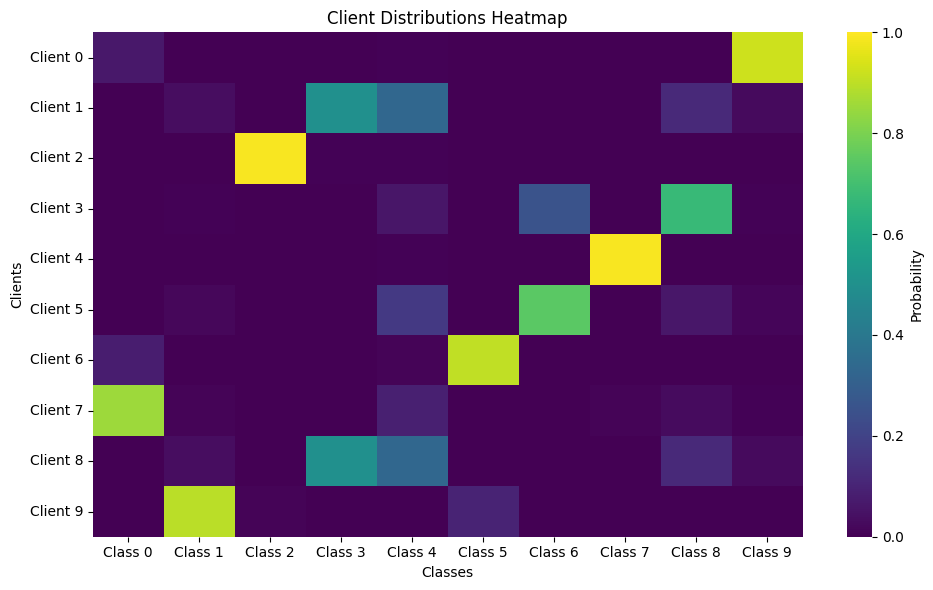

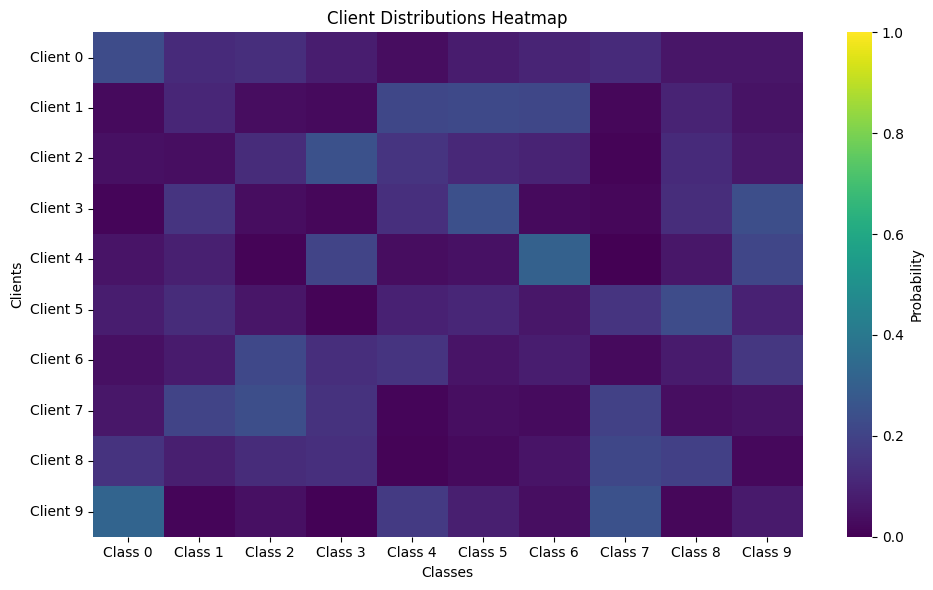

array([[0.22683091, 0.12108064, 0.13008049, 0.08129367, 0.03370129,
        0.07477005, 0.10069156, 0.11970927, 0.05601858, 0.0558236 ],
       [0.02637515, 0.10827985, 0.032433  , 0.024362  , 0.21454714,
        0.22048609, 0.21401882, 0.0176362 , 0.09401482, 0.04784687],
       [0.03946744, 0.03679684, 0.1248915 , 0.2496612 , 0.14896777,
        0.11242525, 0.0968394 , 0.00856385, 0.11725386, 0.06513287],
       [0.01308025, 0.14854603, 0.03440209, 0.01922064, 0.13474236,
        0.24484357, 0.02408175, 0.01909849, 0.12687793, 0.2351069 ],
       [0.05311342, 0.08630861, 0.00787331, 0.20183893, 0.0320107 ,
        0.04412135, 0.30622256, 0.0021361 , 0.05882164, 0.2075534 ],
       [0.07842194, 0.12465344, 0.05582416, 0.00938721, 0.09213639,
        0.10658973, 0.05922754, 0.15224682, 0.22811732, 0.09339543],
       [0.04115284, 0.07377204, 0.21663937, 0.12903611, 0.14876951,
        0.05168255, 0.08086995, 0.02565204, 0.07240635, 0.16001922],
       [0.05871465, 0.2028808 , 0.2368044

In [3]:
from utils import visualize_client_distributions

visualize_client_distributions(client_distribution3)

visualize_client_distributions(client_distribution4)


#### Experimental Algorithm and Parameter Settings

In [4]:
loss_results = {}
acc_results = {}
record_interval ={}

In [5]:
from algorithms import FedAvg, SCAFFOLD
import random
seed=26
random.seed(seed)
torch.manual_seed(seed)
theta = 0.9
iteration = 1001
criterion = torch.nn.CrossEntropyLoss()
inner_iter = 5
gamma_to_test = [0.05] 
inner_lr = 0.01
algo_name = "FedAvg" #0.05
for gamma in gamma_to_test:
    print(gamma)
    clients, server = create_fresh_models("ResNet-18", dataset_list3, train_dataloader, test_dataloader, 
                                            batch_size, num_classes, inner_lr, client_device, server_device, algo_name, theta)
        
    algorithm = FedAvg(clients, server, theta, "FedAvg")
    loss, acc, grad_norm = algorithm.fedavg(iteration, criterion, gamma, inner_iter,record_interval=10)
    loss_results[f"{algo_name}"] = loss
    acc_results[f"{algo_name}"] = acc

0.05
FedAvg 0.0
FedAvg Round 0: Loss = 2.3337, Accuracy = 10.00%
FedAvg Round 10: Loss = 2.3031, Accuracy = 11.00%
FedAvg Round 20: Loss = 2.2806, Accuracy = 15.06%
FedAvg Round 30: Loss = 2.2633, Accuracy = 15.25%
FedAvg Round 40: Loss = 2.2335, Accuracy = 15.63%
FedAvg Round 50: Loss = 2.1931, Accuracy = 16.79%
FedAvg Round 60: Loss = 2.1561, Accuracy = 18.15%
FedAvg Round 70: Loss = 2.1238, Accuracy = 17.56%
FedAvg Round 80: Loss = 2.0821, Accuracy = 20.85%
FedAvg Round 90: Loss = 2.0570, Accuracy = 23.11%
FedAvg Round 100: Loss = 2.0331, Accuracy = 25.10%
FedAvg Round 110: Loss = 2.0048, Accuracy = 25.89%
FedAvg Round 120: Loss = 2.0010, Accuracy = 25.49%
FedAvg Round 130: Loss = 1.9768, Accuracy = 27.31%
FedAvg Round 140: Loss = 1.9572, Accuracy = 29.86%
FedAvg Round 150: Loss = 1.9514, Accuracy = 30.64%
FedAvg Round 160: Loss = 1.9479, Accuracy = 30.61%
FedAvg Round 170: Loss = 1.9299, Accuracy = 31.11%
FedAvg Round 180: Loss = 1.9125, Accuracy = 32.51%
FedAvg Round 190: Loss = 1

In [6]:
from algorithms import FedAvg, SCAFFOLD
import random
seed=26
random.seed(seed)
torch.manual_seed(seed)
theta = 0.9
iteration = 1001
criterion = torch.nn.CrossEntropyLoss()
inner_iter = 5
gamma_to_test = [1] 
inner_lr = 0.01
algo_name = "FedAvg-GN-M" # 1
for gamma in gamma_to_test:
    print(gamma)
    clients, server = create_fresh_models("ResNet-18", dataset_list3, train_dataloader, test_dataloader, 
                                            batch_size, num_classes, inner_lr, client_device, server_device, algo_name, theta)
        
    algorithm = FedAvg(clients, server, theta, algo_name)
    loss, acc, grad_norm = algorithm.fedavg(iteration, criterion, gamma, inner_iter,record_interval=10)
    loss_results[f"{algo_name}"] = loss
    acc_results[f"{algo_name}"] = acc

1
FedAvg-GN-M 0.0
FedAvg-GN-M Round 0: Loss = 6.1810, Accuracy = 10.00%
FedAvg-GN-M Round 10: Loss = 6.8551, Accuracy = 10.00%


FedAvg-GN-M Round 20: Loss = 4.8641, Accuracy = 10.00%
FedAvg-GN-M Round 30: Loss = 2.9974, Accuracy = 15.84%
FedAvg-GN-M Round 40: Loss = 2.4695, Accuracy = 10.00%
FedAvg-GN-M Round 50: Loss = 2.2187, Accuracy = 16.51%
FedAvg-GN-M Round 60: Loss = 2.1920, Accuracy = 17.86%
FedAvg-GN-M Round 70: Loss = 2.1017, Accuracy = 20.41%
FedAvg-GN-M Round 80: Loss = 2.0609, Accuracy = 21.55%
FedAvg-GN-M Round 90: Loss = 2.5973, Accuracy = 13.82%
FedAvg-GN-M Round 100: Loss = 1.9927, Accuracy = 26.42%
FedAvg-GN-M Round 110: Loss = 2.0857, Accuracy = 23.51%
FedAvg-GN-M Round 120: Loss = 2.1653, Accuracy = 19.94%
FedAvg-GN-M Round 130: Loss = 2.0299, Accuracy = 21.68%
FedAvg-GN-M Round 140: Loss = 1.9260, Accuracy = 25.00%
FedAvg-GN-M Round 150: Loss = 1.9370, Accuracy = 27.40%
FedAvg-GN-M Round 160: Loss = 1.9193, Accuracy = 25.97%
FedAvg-GN-M Round 170: Loss = 1.9274, Accuracy = 30.58%
FedAvg-GN-M Round 180: Loss = 1.8765, Accuracy = 31.77%
FedAvg-GN-M Round 190: Loss = 1.8669, Accuracy = 33.60%


In [7]:
from algorithms import FedAvg, SCAFFOLD
import random
seed=26
random.seed(seed)
torch.manual_seed(seed)
theta = 0.9
iteration = 1001
criterion = torch.nn.CrossEntropyLoss()
inner_iter = 5
gamma_to_test = [0.1] 
inner_lr = 0.01
algo_name = "FedAvg-M"  #0.1 
for gamma in gamma_to_test:
    print(gamma)
    clients, server = create_fresh_models("ResNet-18", dataset_list3, train_dataloader, test_dataloader, 
                                            batch_size, num_classes, inner_lr, client_device, server_device, algo_name, theta)
        
    algorithm = FedAvg(clients, server, theta, algo_name)
    loss, acc, grad_norm = algorithm.fedavg(iteration, criterion, gamma, inner_iter,record_interval=10)
    loss_results[f"{algo_name}"] = loss
    acc_results[f"{algo_name}"] = acc

0.1
FedAvg-M 0.9
FedAvg-M Round 0: Loss = 4.6376, Accuracy = 10.00%


FedAvg-M Round 10: Loss = 2.3245, Accuracy = 12.04%
FedAvg-M Round 20: Loss = 2.2760, Accuracy = 14.91%
FedAvg-M Round 30: Loss = 2.2345, Accuracy = 14.75%
FedAvg-M Round 40: Loss = 2.1497, Accuracy = 21.91%
FedAvg-M Round 50: Loss = 2.3478, Accuracy = 13.19%
FedAvg-M Round 60: Loss = 2.0549, Accuracy = 25.55%
FedAvg-M Round 70: Loss = 2.0022, Accuracy = 27.39%
FedAvg-M Round 80: Loss = 2.0132, Accuracy = 25.76%
FedAvg-M Round 90: Loss = 1.9294, Accuracy = 31.27%
FedAvg-M Round 100: Loss = 1.9630, Accuracy = 28.81%
FedAvg-M Round 110: Loss = 1.8694, Accuracy = 33.06%
FedAvg-M Round 120: Loss = 2.0150, Accuracy = 28.09%
FedAvg-M Round 130: Loss = 1.9534, Accuracy = 31.29%
FedAvg-M Round 140: Loss = 1.8131, Accuracy = 34.40%
FedAvg-M Round 150: Loss = 1.8110, Accuracy = 34.94%
FedAvg-M Round 160: Loss = 1.7728, Accuracy = 36.09%
FedAvg-M Round 170: Loss = 1.8350, Accuracy = 34.60%
FedAvg-M Round 180: Loss = 2.0735, Accuracy = 30.45%
FedAvg-M Round 190: Loss = 1.9183, Accuracy = 32.60%
Fe

In [8]:
from algorithms import FedAvg, SCAFFOLD
import random
seed=26
random.seed(seed)
torch.manual_seed(seed)
theta = 0.9
iteration = 1001
criterion = torch.nn.CrossEntropyLoss()
inner_iter = 5
gamma_to_test = [0.5] 
inner_lr = 0.01
algo_name = "SCAFFOLD"  #0.5
for gamma in gamma_to_test:
    print(gamma)
    clients, server = create_fresh_models("ResNet-18", dataset_list3, train_dataloader, test_dataloader, 
                                            batch_size, num_classes, inner_lr, client_device, server_device, algo_name, theta)
        
    algorithm = SCAFFOLD(clients, server)
    loss, acc = algorithm.scaffold(iteration, criterion, gamma, inner_iter,record_interval=10)
    loss_results[f"{algo_name}"] = loss
    acc_results[f"{algo_name}"] = acc

0.5
SCAFFOLD 0.0
SCAFFOLD Round 0: Loss = 5.2597, Accuracy = 10.01%
SCAFFOLD Round 10: Loss = 12.2967, Accuracy = 10.00%
SCAFFOLD Round 20: Loss = 8.4937, Accuracy = 10.00%
SCAFFOLD Round 30: Loss = 2.3900, Accuracy = 10.00%
SCAFFOLD Round 40: Loss = 2.2883, Accuracy = 14.13%
SCAFFOLD Round 50: Loss = 2.2607, Accuracy = 17.31%
SCAFFOLD Round 60: Loss = 2.2397, Accuracy = 15.28%
SCAFFOLD Round 70: Loss = 2.2190, Accuracy = 16.96%
SCAFFOLD Round 80: Loss = 2.2835, Accuracy = 13.30%
SCAFFOLD Round 90: Loss = 2.1439, Accuracy = 18.36%
SCAFFOLD Round 100: Loss = 2.1786, Accuracy = 15.32%
SCAFFOLD Round 110: Loss = 2.1497, Accuracy = 19.26%
SCAFFOLD Round 120: Loss = 2.0862, Accuracy = 22.19%
SCAFFOLD Round 130: Loss = 2.0243, Accuracy = 22.85%
SCAFFOLD Round 140: Loss = 2.1607, Accuracy = 20.54%
SCAFFOLD Round 150: Loss = 2.6629, Accuracy = 12.07%
SCAFFOLD Round 160: Loss = 2.2508, Accuracy = 20.29%
SCAFFOLD Round 170: Loss = 2.2740, Accuracy = 18.86%
SCAFFOLD Round 180: Loss = 2.4460, Accu

In [ ]:
from algorithms import FedAvg, SCAFFOLD
import random
seed=26
random.seed(seed)
torch.manual_seed(seed)
theta = 0.9
iteration = 1001
criterion = torch.nn.CrossEntropyLoss()
inner_iter = 5
gamma = 0.05
inner_lr = 0.05
algorithms_to_test = ["FedAvg-GN-M","FedAvg", "FedAvg-M","SCAFFOLD"]

loss_results = {}
acc_results = {}
grad_norm_results = {}


gamma1=0.1
inner_lr1=0.02
for algo_name in algorithms_to_test:
    if algo_name in ["FedAvg-GN","FedAvg-GN-M"]:
        gamma=gamma1
        inner_lr=inner_lr1
        
    else:
        gamma=gamma1
        inner_lr=inner_lr1
    clients, server = create_fresh_models("ResNet-18", dataset_list3, train_dataloader, test_dataloader, 
                                          batch_size, num_classes, inner_lr, client_device, server_device, algo_name, theta)
    
        
    # if algo_name not in ["FedAvg-GN-M"]:
    #     continue
    if algo_name == "SCAFFOLD":
        algorithm = SCAFFOLD(clients, server)
        loss, acc = algorithm.scaffold(iteration, criterion, gamma, inner_iter,record_interval=10)
    else:
        # continue
        algorithm = FedAvg(clients, server, theta, algo_name)
        loss, acc, grad_norm = algorithm.fedavg(iteration, criterion, gamma, inner_iter,record_interval=10)

    loss_results[algo_name] = loss
    acc_results[algo_name] = acc
    if algo_name in ["FedAvg-GN-M"]:
        grad_norm_results[algo_name] = grad_norm


FedAvg-GN-M 0.0
FedAvg-GN-M Round 0: Loss = 2.3551, Accuracy = 10.00%
FedAvg-GN-M Round 10: Loss = 2.4874, Accuracy = 10.00%
FedAvg-GN-M Round 20: Loss = 2.3814, Accuracy = 10.00%
FedAvg-GN-M Round 30: Loss = 2.3161, Accuracy = 14.81%
FedAvg-GN-M Round 40: Loss = 2.1888, Accuracy = 18.26%
FedAvg-GN-M Round 50: Loss = 2.1059, Accuracy = 19.21%
FedAvg-GN-M Round 60: Loss = 2.0073, Accuracy = 23.64%
FedAvg-GN-M Round 70: Loss = 1.9361, Accuracy = 28.36%
FedAvg-GN-M Round 80: Loss = 1.8969, Accuracy = 30.85%
FedAvg-GN-M Round 90: Loss = 1.8416, Accuracy = 33.62%
FedAvg-GN-M Round 100: Loss = 1.8060, Accuracy = 35.55%
FedAvg-GN-M Round 110: Loss = 1.7250, Accuracy = 37.70%
FedAvg-GN-M Round 120: Loss = 1.6825, Accuracy = 39.04%
FedAvg-GN-M Round 130: Loss = 1.6612, Accuracy = 40.48%
FedAvg-GN-M Round 140: Loss = 1.6289, Accuracy = 41.82%
FedAvg-GN-M Round 150: Loss = 1.5939, Accuracy = 43.61%
FedAvg-GN-M Round 160: Loss = 1.5183, Accuracy = 44.90%
FedAvg-GN-M Round 170: Loss = 1.5544, Accur

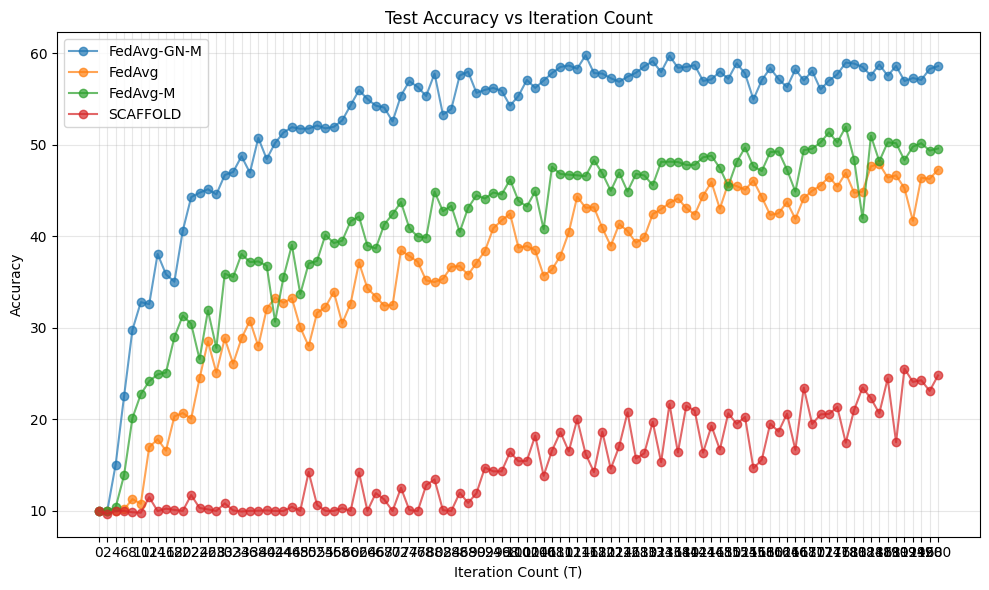

In [5]:
plot_accuracy_comparison(acc_results)

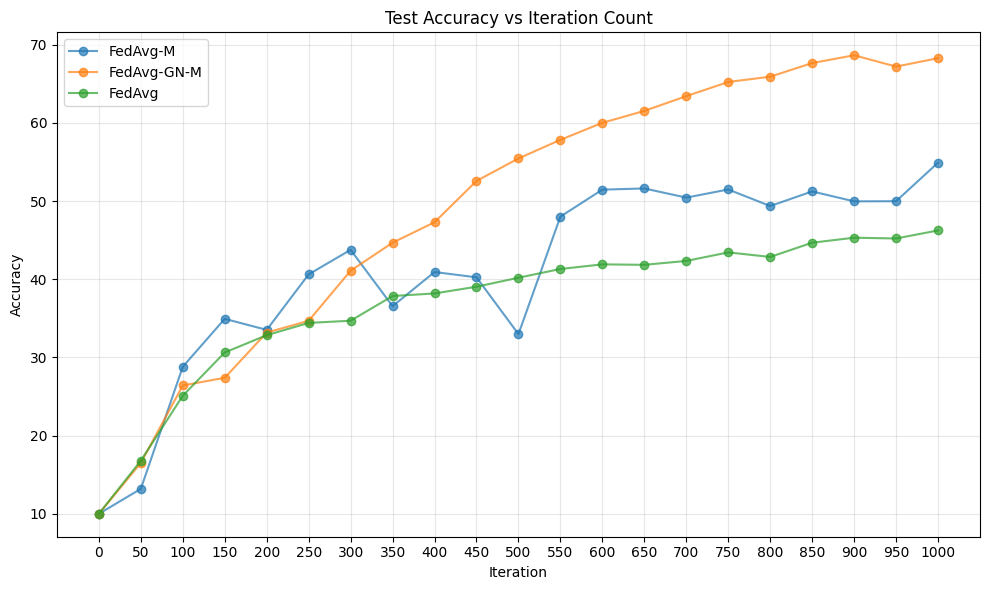

In [8]:
import matplotlib.pyplot as plt
import numpy as np
figsize=(10, 6)
title='Test Accuracy vs Iteration Count'
acc_results

plt.figure(figsize=figsize)
interval = 5

x = np.arange(0,len(acc_results["FedAvg-M"])*10,interval*10)
    
plt.plot(x, acc_results["FedAvg-M"][::interval], '-o', label="FedAvg-M", alpha=0.7)
plt.plot(x, acc_results["FedAvg-GN-M"][::interval], '-o', label="FedAvg-GN-M", alpha=0.7)
# plt.plot(x, acc_results["SCAFFOLD"][::interval], '-o', label="SCAFFOLD", alpha=0.7)
plt.plot(x, acc_results["FedAvg"][::interval], '-o', label="FedAvg", alpha=0.7)
# plt.plot(x, acc_results["FedAvg-GN"], '-o', label="FedAvg with only grad norm", alpha=0.7)
# plt.plot(np.arange(0,len(acc_results["EF21-SGDM"]),2), acc_results["QSGD-GN-M u=2"][::2], '-o', label="Normalized QSGD u=2", alpha=0.7)
plt.title(title)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xticks(x)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
from algorithms import FedAvg, SCAFFOLD
import random
seed=26
random.seed(seed)
torch.manual_seed(seed)
theta = 0.9
iteration = 81
criterion = torch.nn.CrossEntropyLoss()
inner_iter = 5
gamma = 0.05
inner_lr = 0.01
algorithms_to_test = ["FedAvg", "FedAvg-GN","FedAvg-M","FedAvg-GN-M","SCAFFOLD"]

loss_results = {}
acc_results = {}
grad_norm_results = {}


gamma1=0.05
inner_lr1=0.05
for algo_name in algorithms_to_test:
    if algo_name in ["FedAvg-GN","FedAvg-GN-M"]:
        gamma=gamma1
        inner_lr=inner_lr1
        
    else:
        gamma=gamma1
        inner_lr=inner_lr1
    clients, server = create_fresh_models("ResNet-18", dataset_list4, train_dataloader, test_dataloader, 
                                          batch_size, num_classes, inner_lr, client_device, server_device, algo_name, theta)
    
        
    # if algo_name not in ["FedAvg-GN-M"]:
    #     continue
    if algo_name == "SCAFFOLD":
        algorithm = SCAFFOLD(clients, server)
        loss, acc = algorithm.scaffold(iteration, criterion, gamma, inner_iter)
    else:
        # continue
        algorithm = FedAvg(clients, server, theta, algo_name)
        loss, acc, grad_norm = algorithm.fedavg(iteration, criterion, gamma, inner_iter,record_interval=5)

    loss_results[algo_name] = loss
    acc_results[algo_name] = acc
    if algo_name in ["FedAvg-GN-M"]:
        grad_norm_results[algo_name] = grad_norm
